In [19]:
import pandas as pd

# load the train labels
train_df = pd.read_csv("C:\\Users\\user\\OneDrive - hull.ac.uk\\Understanding ai final assesment\\component 2\\train\\train\\train.csv")
print(train_df.head())
print(train_df['label'].value_counts())


   image_id filename  label
0         1    1.jpg      2
1         2    2.jpg      4
2         3    3.jpg      2
3         4    4.jpg      3
4         5    5.jpg      5
label
2    2349
4    2079
5    1185
6     882
3     534
1     171
Name: count, dtype: int64


In [20]:
import pandas as pd
train_df = pd.read_csv("C:\\Users\\user\\OneDrive - hull.ac.uk\\Understanding ai final assesment\\component 2\\train\\train\\train.csv")
print("Rows in CSV:", len(train_df))


Rows in CSV: 7200


In [1]:
import pandas as pd
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# load CSV
train_df = pd.read_csv("C:\\Users\\user\\OneDrive - hull.ac.uk\\Understanding ai final assesment\\component 2\\train\\train\\train.csv")

# image folder directory 
image_dir = "C:\\Users\\user\\OneDrive - hull.ac.uk\\Understanding ai final assesment\\component 2\\train\\train\\images"
image_size = (128, 128)

# label mapping
label_mapping = {
    1: 'crack',
    2: 'scratch',
    3: 'tire flat',
    4: 'dent',
    5: 'glass shatter',
    6: 'lamp broken'
}
images = []
labels = []

# loop through the rows
for index, row in train_df.iterrows():
    img_path = os.path.join(image_dir, row['filename']) 
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, image_size)
        img = img / 255.0  # Normalize
        images.append(img)
        labels.append(row['label'])

# converts to arrays
images = np.array(images)
labels = np.array(labels)

# encode the labels of class
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
label_names = le.classes_
print("Label classes:", label_names)

# train/validation split
X_train, X_val, y_train, y_val = train_test_split(
    images, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)

print("Training samples:", len(X_train))
print("Validation samples:", len(X_val))


Label classes: [1 2 3 4 5 6]
Training samples: 5760
Validation samples: 1440


In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  #for the six classes
])

model.summary()


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,414 (12.61 MB)

 Trainable params: 3,305,414 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [29]:
from tensorflow.keras.callbacks import EarlyStopping

# early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)


Epoch 1/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 119s 634ms/step - accuracy: 0.3195 - loss: 1.8143 - val_accuracy: 0.4222 - val_loss: 1.4529
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 111s 618ms/step - accuracy: 0.4038 - loss: 1.4033 - val_accuracy: 0.4847 - val_loss: 1.2604
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 140s 608ms/step - accuracy: 0.4653 - loss: 1.2773 - val_accuracy: 0.5431 - val_loss: 1.0969
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 114s 634ms/step - accuracy: 0.5173 - loss: 1.1672 - val_accuracy: 0.5465 - val_loss: 1.0659
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 113s 626ms/step - accuracy: 0.5603 - loss: 1.0454 - val_accuracy: 0.5972 - val_loss: 0.9696
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 105s 581ms/step - accuracy: 0.5985 - loss: 0.9801 - val_accuracy: 0.6243 - val_loss: 0.9043
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 113s 626ms/step - accuracy: 0.6294 - loss: 0.8733 - val_accuracy: 0.6313 - val_loss: 0.8843
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 111s 616ms/step - accuracy: 0.6653 -

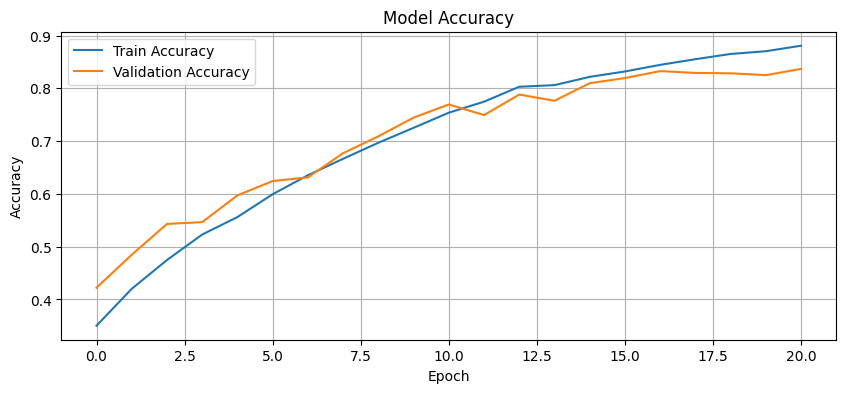

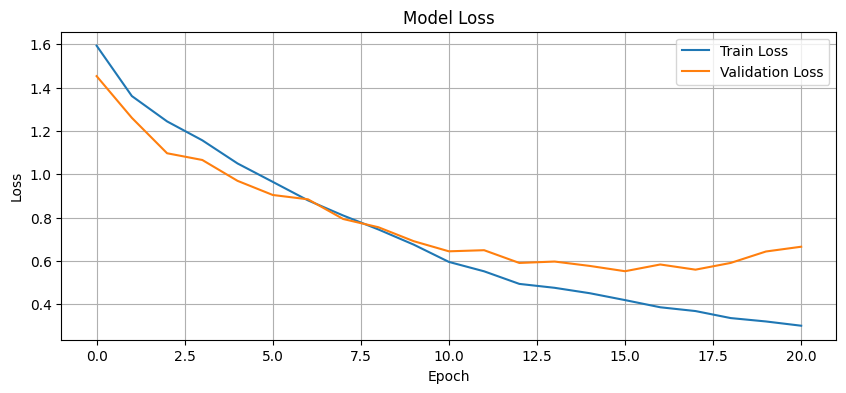

In [30]:
import matplotlib.pyplot as plt

# accuracy
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [31]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"\nValidation Accuracy: {val_acc:.4f}")


45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.8295 - loss: 0.5436

Validation Accuracy: 0.8194


45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.56      0.72        34
           2       0.80      0.80      0.80       470
           3       0.83      0.95      0.89       107
           4       0.78      0.75      0.76       416
           5       0.90      0.94      0.92       237
           6       0.81      0.85      0.83       176

    accuracy                           0.82      1440
   macro avg       0.85      0.81      0.82      1440
weighted avg       0.82      0.82      0.82      1440



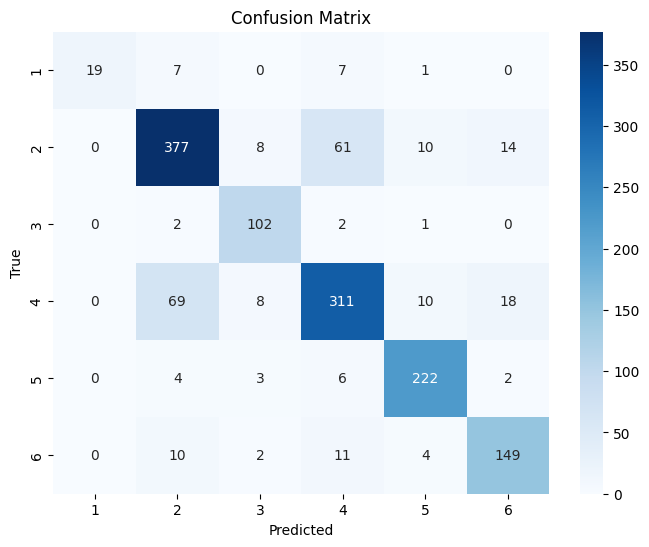

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# prediction to validation set
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)

# classification report
# Convert encoded labels back to unique class names as strings
label_names = le.inverse_transform(sorted(np.unique(y_val)))
label_names = [str(label) for label in label_names]  

print("Classification Report:")
print(classification_report(y_val, y_pred, target_names=label_names))

label_names = le.inverse_transform(np.unique(y_val))

# confusion matrix
cm = confusion_matrix(y_val, y_pred)

# confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_names, yticklabels=label_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
